In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
data = pd.read_excel('/titanic.xlsx')


In [5]:
data.shape

(891, 12)

In [6]:
#Perform exploratory data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [7]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,NaN,S


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Find missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
Age_median = data['Age'].median()
data['Age'] = data['Age'].fillna(Age_median )

In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
Cabin_mode = data['Cabin'].mode()[0]
data['Cabin'] = data['Cabin'].fillna(Cabin_mode)


In [13]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [14]:
Embarked_mode = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(Embarked_mode)


In [15]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
data1 = data.drop('PassengerId',axis=1)


In [17]:
#Encoding



In [18]:
data1 = pd.get_dummies(data1)

In [19]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1.0,38.0,1.0,0.0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,35.0,1.0,0.0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,3.0,35.0,0.0,0.0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:

#Checking if its a balance or imbalanced data
data["Survived"].value_counts()



0.0    549
1.0    342
Name: Survived, dtype: int64

In [21]:
x = data1.drop('Survived', axis=1)
y= data1['Survived']

In [22]:
## Hold out technique

In [23]:
#split the data
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.25,
                                                   random_state=100)

In [25]:
#Finding optimum number of cluster for knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k=[]
neighbors=range(3,13)
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn=knn.fit(x_train,y_train)
    y_knn=knn.predict(x_test)
    acc=accuracy_score(y_test,y_knn)
    k.append(acc)

In [26]:
print(k)

[0.7085201793721974, 0.6771300448430493, 0.6771300448430493, 0.6636771300448431, 0.6681614349775785, 0.6502242152466368, 0.6591928251121076, 0.6367713004484304, 0.6636771300448431, 0.6412556053811659]


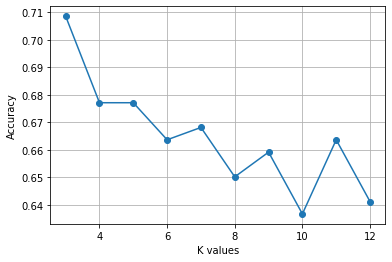

In [27]:
plt.plot(neighbors,k,"o-")
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.grid()

In [28]:
#more accuracy is at k= 3

In [29]:
#Build the model with k=9
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model=knn_model.fit(x_train,y_train)
y_knnmodel=knn_model.predict(x_test)


In [30]:
#Calculate the score
score_knn=knn_model.score(x_test,y_test)
score_knn

0.7085201793721974

In [31]:
### K-Fold cross validation

In [32]:
from sklearn.model_selection import KFold

In [33]:
kfold_validator = KFold(10)

In [34]:
for train_index,test_index in kfold_validator.split(x,y):
    print("Training Index:", train_index)
    print("Test Index :",test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [35]:
#calculate cross validation score
from sklearn.model_selection import cross_val_score
cs_knn=cross_val_score(knn_model,x,y,cv=kfold_validator)
cs_knn

array([0.66666667, 0.69662921, 0.70786517, 0.71910112, 0.78651685,
       0.73033708, 0.74157303, 0.70786517, 0.69662921, 0.78651685])

In [36]:
#Average of K_fold
np.mean(cs_knn)

0.7239700374531834

In [37]:
## Stratified k-fold cross validation

In [38]:
from sklearn.model_selection import StratifiedKFold
skfold_val=StratifiedKFold(n_splits=10)

In [39]:
for train_index,test_index in skfold_val.split(x,y):
    print("Training Index:", train_index)
    print("Test Index :",test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [41]:
#calculate stratified cross validation score
sf_kn=cross_val_score(knn_model,x,y,cv=skfold_val)
sf_kn

array([0.67777778, 0.6741573 , 0.73033708, 0.74157303, 0.79775281,
       0.71910112, 0.76404494, 0.73033708, 0.66292135, 0.78651685])

In [42]:
#Average of stratified kfold
np.mean(sf_kn)

0.7284519350811485

In [43]:
####    SVM Model Building

In [44]:
from sklearn.svm import SVC
svm_model=SVC(kernel="linear")
svm_model=svm_model.fit(x_train,y_train)
y_svm=svm_model.predict(x_test)

In [45]:
#Calculate the score
score_svm=svm_model.score(x_test,y_test)
score_svm

0.8251121076233184

In [46]:
###   K-Fold Cross Validation

In [47]:
from sklearn.model_selection import KFold
kf_svm=KFold(10)

In [48]:
for train_index,test_index in kf_svm.split(x,y):
    print("Train_index:", train_index)
    print("Test_ index:", test_index)

Train_index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 3

In [49]:
svm_val=cross_val_score(svm_model,x,y,cv=kf_svm)
svm_val

array([0.84444444, 0.84269663, 0.79775281, 0.84269663, 0.85393258,
       0.80898876, 0.79775281, 0.84269663, 0.85393258, 0.84269663])

In [50]:
#Average value of kfold method
np.mean(svm_val)

0.8327590511860175

In [51]:
###  Stratified K Fold Validation



In [52]:
svm_st=StratifiedKFold(n_splits=10)
for train_index,test_index in svm_st.split(x,y):
    print("Training Index:", train_index)
    print("Test Index :",test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [53]:
svm_strat=cross_val_score(svm_model,x,y,cv=svm_st)
svm_strat

array([0.86666667, 0.83146067, 0.76404494, 0.85393258, 0.86516854,
       0.80898876, 0.82022472, 0.85393258, 0.84269663, 0.84269663])

In [54]:
#calculate average stratified score of svm model
np.mean(svm_strat)

0.8349812734082397

In [55]:
###   My finfings.......



In [56]:
#   1    KNearest neighbor model's K-fold cross validation average is: 0.7239700374531834

#   2    KNearest neighbor model's Stratified K-fold cross validation average is: 0.7284519350811485

#   3    SVM models's K-fold cross validation average is: 0.8327590511860175

#   4    SVM model's Stratified K-fold cross validation average is: 0.8349812734082397